In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential 


In [2]:
df= pd.read_csv('std_dataset.csv')

In [3]:
df

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,0,15.2,29.9,33.4,89.3,0
1,0,11.9,31.0,32.5,95.4,1
2,0,17.2,31.1,34.3,90.5,0
3,0,12.9,28.0,34.0,82.1,0
4,1,14.5,30.6,33.0,92.8,0
...,...,...,...,...,...,...
10324,0,10.6,25.4,28.2,82.9,1
10325,1,12.1,28.3,30.4,86.9,1
10326,1,13.1,17.7,28.1,80.7,1
10327,0,14.3,16.2,29.5,95.2,0


In [4]:
df.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

In [5]:
df['Result'].value_counts()

Result
0    6597
1    3732
Name: count, dtype: int64

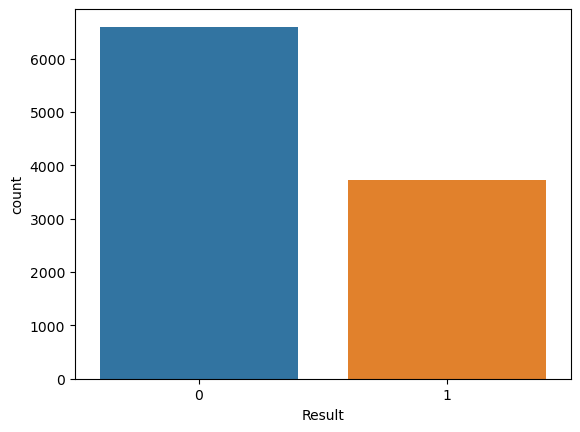

In [6]:
df['Result'] = df['Result'].astype('category')
sns.countplot(data=df, x='Result')
plt.show()



In [7]:
df['RBC'] = (df['Hemoglobin']/df['MCH'])*10

In [8]:
df

,Gender,Hemoglobin,MCH,MCHC,MCV,Result,RBC
0,0,15.2,29.9,33.4,89.3,0,5.083612
1,0,11.9,31.0,32.5,95.4,1,3.838710
2,0,17.2,31.1,34.3,90.5,0,5.530547
3,0,12.9,28.0,34.0,82.1,0,4.607143
4,1,14.5,30.6,33.0,92.8,0,4.738562
...,...,...,...,...,...,...,...
10324,0,10.6,25.4,28.2,82.9,1,4.173228
10325,1,12.1,28.3,30.4,86.9,1,4.275618
10326,1,13.1,17.7,28.1,80.7,1,7.401130
10327,0,14.3,16.2,29.5,95.2,0,8.827160


In [9]:
df['PCV'] = (df['Hemoglobin']/3)

In [10]:
df

,Gender,Hemoglobin,MCH,MCHC,MCV,Result,RBC,PCV
0,0,15.2,29.9,33.4,89.3,0,5.083612,5.066667
1,0,11.9,31.0,32.5,95.4,1,3.838710,3.966667
2,0,17.2,31.1,34.3,90.5,0,5.530547,5.733333
3,0,12.9,28.0,34.0,82.1,0,4.607143,4.300000
4,1,14.5,30.6,33.0,92.8,0,4.738562,4.833333
...,...,...,...,...,...,...,...,...
10324,0,10.6,25.4,28.2,82.9,1,4.173228,3.533333
10325,1,12.1,28.3,30.4,86.9,1,4.275618,4.033333
10326,1,13.1,17.7,28.1,80.7,1,7.401130,4.366667
10327,0,14.3,16.2,29.5,95.2,0,8.827160,4.766667


In [11]:
df['HCT'] = (df['Hemoglobin']/df['MCHC'])*100

In [12]:
df

,Gender,Hemoglobin,MCH,MCHC,MCV,Result,RBC,PCV,HCT
0,0,15.2,29.9,33.4,89.3,0,5.083612,5.066667,45.508982
1,0,11.9,31.0,32.5,95.4,1,3.838710,3.966667,36.615385
2,0,17.2,31.1,34.3,90.5,0,5.530547,5.733333,50.145773
3,0,12.9,28.0,34.0,82.1,0,4.607143,4.300000,37.941176
4,1,14.5,30.6,33.0,92.8,0,4.738562,4.833333,43.939394
...,...,...,...,...,...,...,...,...,...
10324,0,10.6,25.4,28.2,82.9,1,4.173228,3.533333,37.588652
10325,1,12.1,28.3,30.4,86.9,1,4.275618,4.033333,39.802632
10326,1,13.1,17.7,28.1,80.7,1,7.401130,4.366667,46.619217
10327,0,14.3,16.2,29.5,95.2,0,8.827160,4.766667,48.474576


In [13]:
df1=df

In [14]:
x= df1.drop(['Result'],axis=1)

In [15]:
x

,Gender,Hemoglobin,MCH,MCHC,MCV,RBC,PCV,HCT
0,0,15.2,29.9,33.4,89.3,5.083612,5.066667,45.508982
1,0,11.9,31.0,32.5,95.4,3.838710,3.966667,36.615385
2,0,17.2,31.1,34.3,90.5,5.530547,5.733333,50.145773
3,0,12.9,28.0,34.0,82.1,4.607143,4.300000,37.941176
4,1,14.5,30.6,33.0,92.8,4.738562,4.833333,43.939394
...,...,...,...,...,...,...,...,...
10324,0,10.6,25.4,28.2,82.9,4.173228,3.533333,37.588652
10325,1,12.1,28.3,30.4,86.9,4.275618,4.033333,39.802632
10326,1,13.1,17.7,28.1,80.7,7.401130,4.366667,46.619217
10327,0,14.3,16.2,29.5,95.2,8.827160,4.766667,48.474576


In [16]:
y = df['Result']

In [17]:
y

0        0
1        1
2        0
3        0
4        0
        ..
10324    1
10325    1
10326    1
10327    0
10328    1
Name: Result, Length: 10329, dtype: category
Categories (2, int64): [0, 1]

In [18]:
from sklearn.feature_selection import SelectKBest

In [19]:
from sklearn.feature_selection import f_classif

In [20]:
fit_fiture = SelectKBest(score_func = f_classif,k=8)

In [21]:
fit_fiture.fit(x,y)

SelectKBest(k=8)

In [22]:
score_colm = pd.DataFrame(fit_fiture.scores_,columns = ['Score'])

In [23]:
score_colm

,Score
0,3633.127096
1,9967.729468
2,561.891423
3,407.200585
4,399.420866
5,1179.897306
6,9967.729468
7,6421.605151


In [24]:
nc = pd.DataFrame(x.columns)

In [25]:
top = pd.concat([nc,score_colm],axis = 1)

In [26]:
top

,0,Score
0,Gender,3633.127096
1,Hemoglobin,9967.729468
2,MCH,561.891423
3,MCHC,407.200585
4,MCV,399.420866
5,RBC,1179.897306
6,PCV,9967.729468
7,HCT,6421.605151


In [27]:
top.nlargest(8,'Score')

,0,Score
6,PCV,9967.729468
1,Hemoglobin,9967.729468
7,HCT,6421.605151
0,Gender,3633.127096
5,RBC,1179.897306
2,MCH,561.891423
3,MCHC,407.200585
4,MCV,399.420866


In [28]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x,y = smote.fit_resample(x,y)
y.value_counts()


Result
0    6597
1    6597
Name: count, dtype: int64

In [29]:
x = np.array(x)
y = np.array(y)

In [30]:
x.shape

(13194, 8)

In [31]:
from sklearn.preprocessing import StandardScaler
stnd = StandardScaler().fit(x)
x = stnd.transform(x)


In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=0)

In [33]:
x_train[0]

array([0.86246976, 1.30218207, 0.93424041, 0.36897843, 1.03878078,
       0.12387082, 1.30218207, 1.13000772])

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rfc = RandomForestClassifier()

In [36]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [37]:
prediction = rfc.predict(x_test)
prediction

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [38]:
from sklearn.metrics import confusion_matrix , classification_report

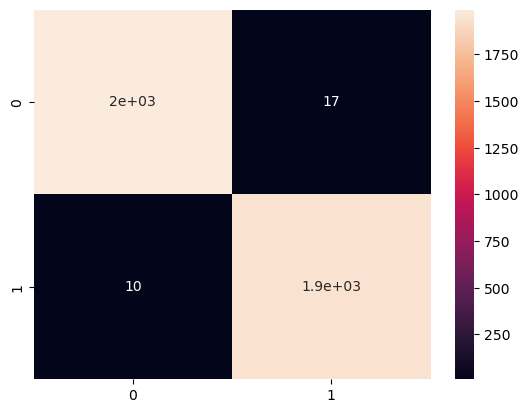

In [39]:
import seaborn as sns
cm = confusion_matrix(y_test,prediction)
sns.heatmap(cm,annot = True)
plt.show()

In [40]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2007
           1       0.99      0.99      0.99      1952

    accuracy                           0.99      3959
   macro avg       0.99      0.99      0.99      3959
weighted avg       0.99      0.99      0.99      3959



In [41]:
num_classes = 2
model = Sequential([
    layers.Dense(50,activation = 'relu'), 
    layers.Dense(30,activation = 'relu'),  
    layers.Dense(20, activation = 'relu'),  
    layers.Dense(10, activation = 'relu'), 
    layers.Dense(num_classes, activation = 'sigmoid') 
    
])

model.compile(optimizer = 'adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics = ['accuracy'])

In [42]:
result = model.fit(x_train, y_train, validation_split=0.1, batch_size =32, epochs = 50)

Epoch 1/50


260/260 [==============================] - 2s 2ms/step - loss: 0.1995 - accuracy: 0.9191 - val_loss: 0.0741 - val_accuracy: 0.9740
Epoch 2/50
260/260 [==============================] - 0s 2ms/step - loss: 0.0566 - accuracy: 0.9865 - val_loss: 0.0606 - val_accuracy: 0.9848
Epoch 3/50
260/260 [==============================] - 0s 2ms/step - loss: 0.0480 - accuracy: 0.9877 - val_loss: 0.0498 - val_accuracy: 0.9870
Epoch 4/50
260/260 [==============================] - 0s 2ms/step - loss: 0.0430 - accuracy: 0.9881 - val_loss: 0.0578 - val_accuracy: 0.9838
Epoch 5/50
260/260 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.9883 - val_loss: 0.0464 - val_accuracy: 0.9870
Epoch 6/50
260/260 [==============================] - 0s 2ms/step - loss: 0.0379 - accuracy: 0.9891 - val_loss: 0.0485 - val_accuracy: 0.9838
Epoch 7/50
260/260 [==============================] - 0s 2ms/step - loss: 0.0355 - accuracy: 0.9884 - val_loss: 0.0474 - val_accuracy: 0.9859
Epoc

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 dense_1 (Dense)             (None, 30)                1530      
                                                                 
 dense_2 (Dense)             (None, 20)                620       
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
 dense_4 (Dense)             (None, 2)                 22        
                                                                 
Total params: 2832 (11.06 KB)
Trainable params: 2832 (11.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
model.evaluate(x_test,y_test)

124/124 [==============================] - 0s 1ms/step - loss: 0.0291 - accuracy: 0.9927


[0.029144244268536568, 0.9926749467849731]

In [45]:
predicted = model.predict(x_test)
predicted1 = np.round(predicted)
predicted2 = []
for i in range(len(predicted1)):
    z = np.argmax(predicted1[i])
    predicted2.append(z)

124/124 [==============================] - 0s 989us/step


In [46]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,predicted2))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2007
           1       0.99      1.00      0.99      1952

    accuracy                           0.99      3959
   macro avg       0.99      0.99      0.99      3959
weighted avg       0.99      0.99      0.99      3959



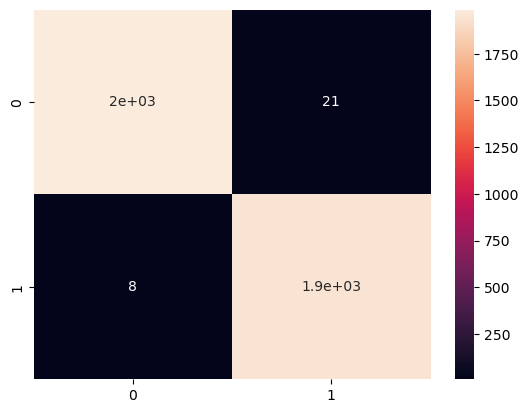

In [47]:
import seaborn as sns
cm = confusion_matrix(y_test,predicted2)
sns.heatmap(cm,annot = True)
plt.show()



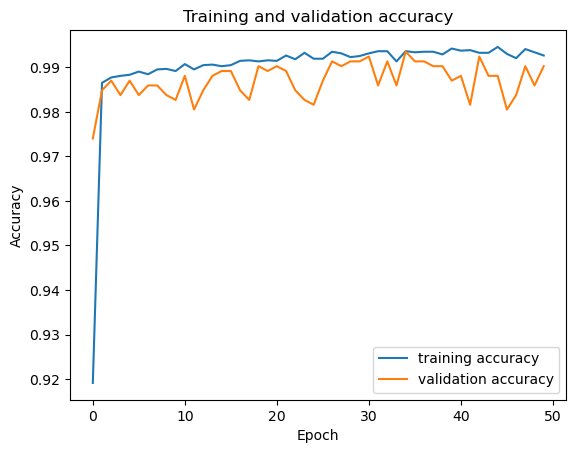

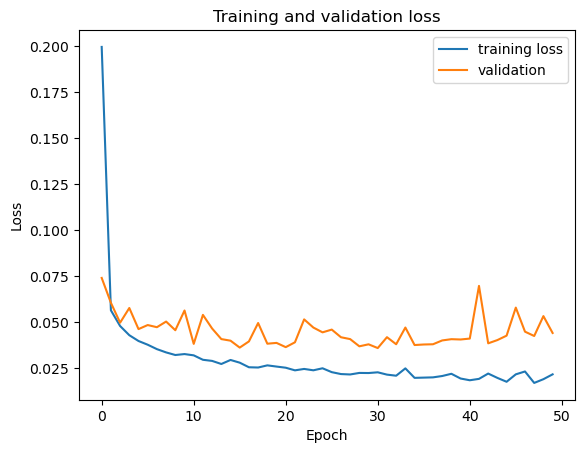

In [48]:

plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training accuracy', 'validation accuracy'], loc='lower right')
plt.savefig('acc.jpg',dpi=500)
plt.show()

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training loss', 'validation'], loc='upper right')
plt.savefig('loss.jpg',dpi=500)
plt.show()